In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
housing_df = pd.read_csv('/content/housing.csv')

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Text(0.5, 0, 'House Values')

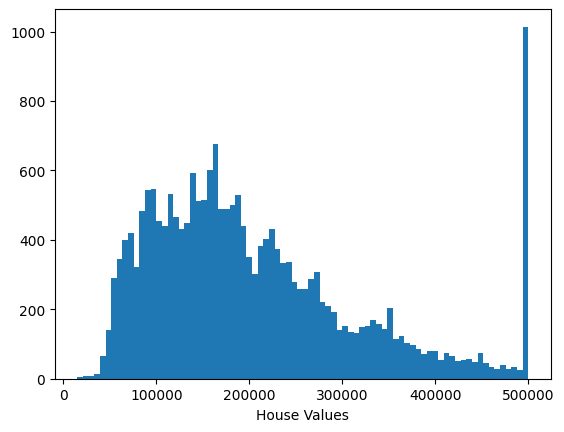

In [4]:
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

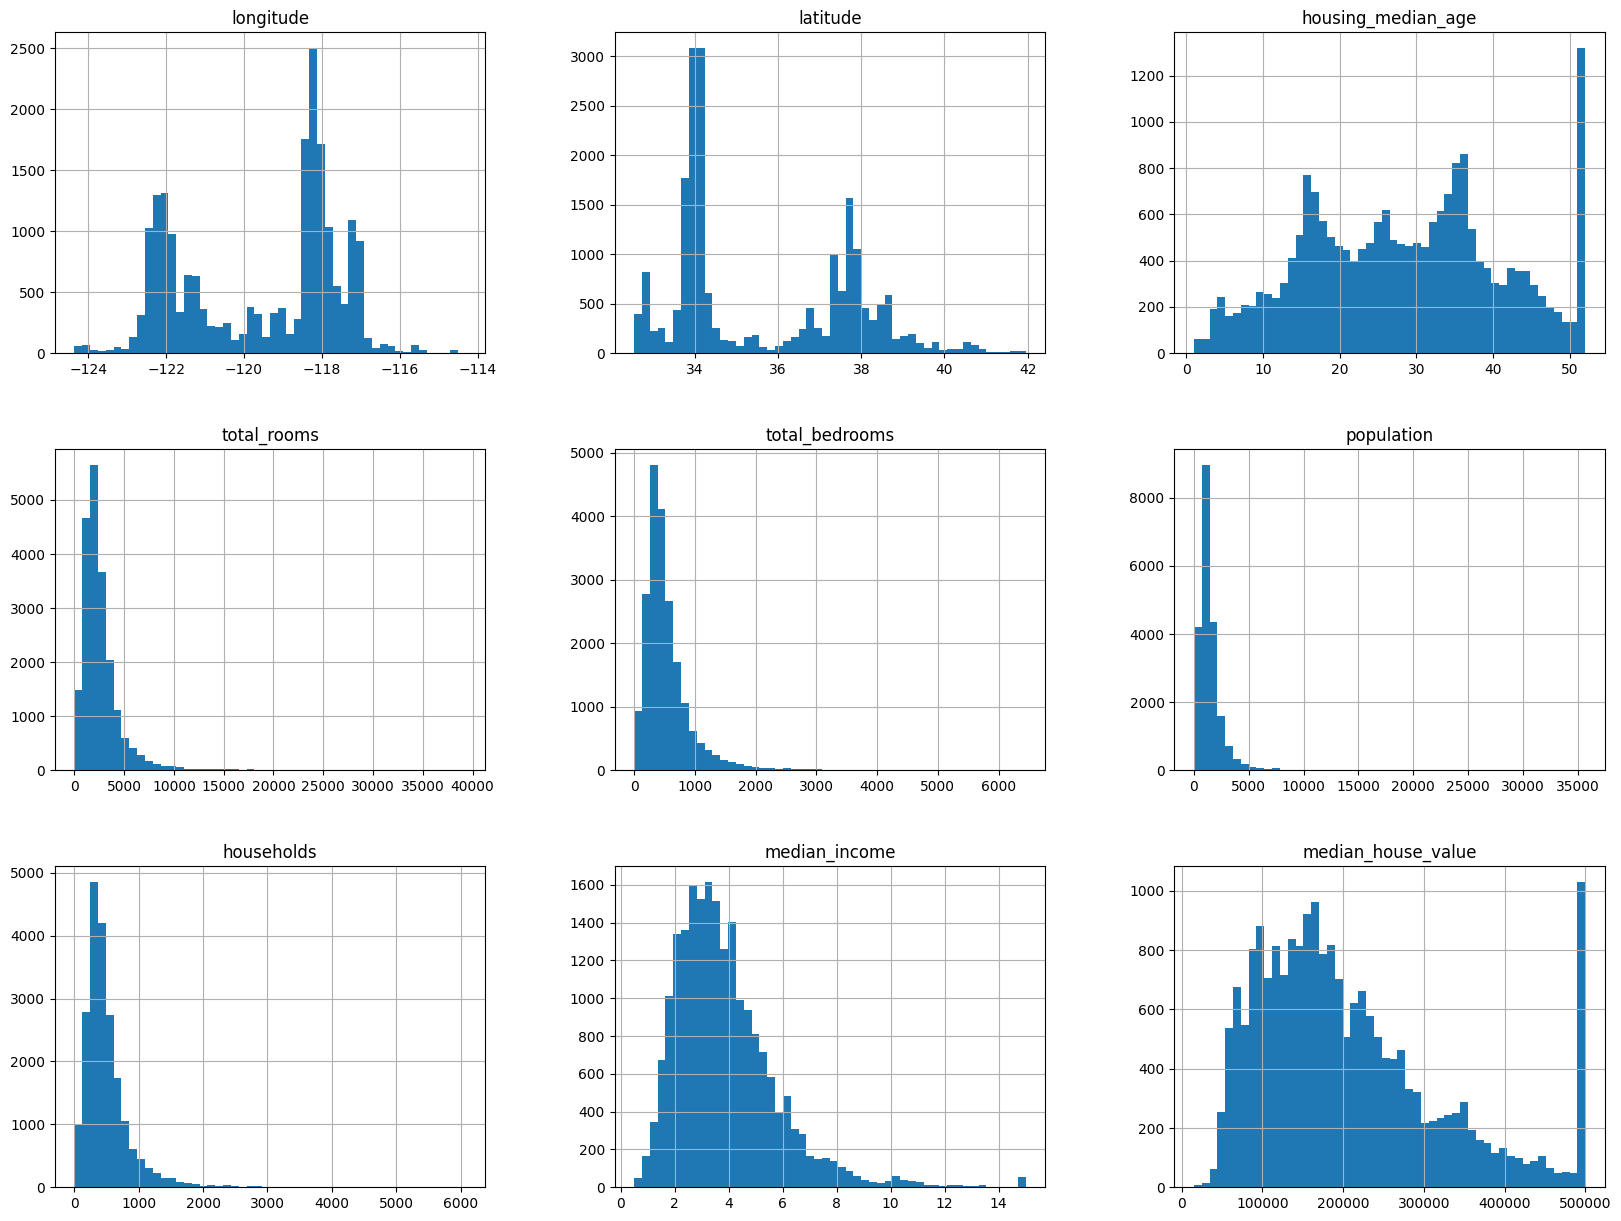

In [5]:
housing_df.hist(bins=50, figsize=(20, 15))

In [6]:
corr = housing_df.select_dtypes(include=np.number).corr() # data frame correlation function

corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


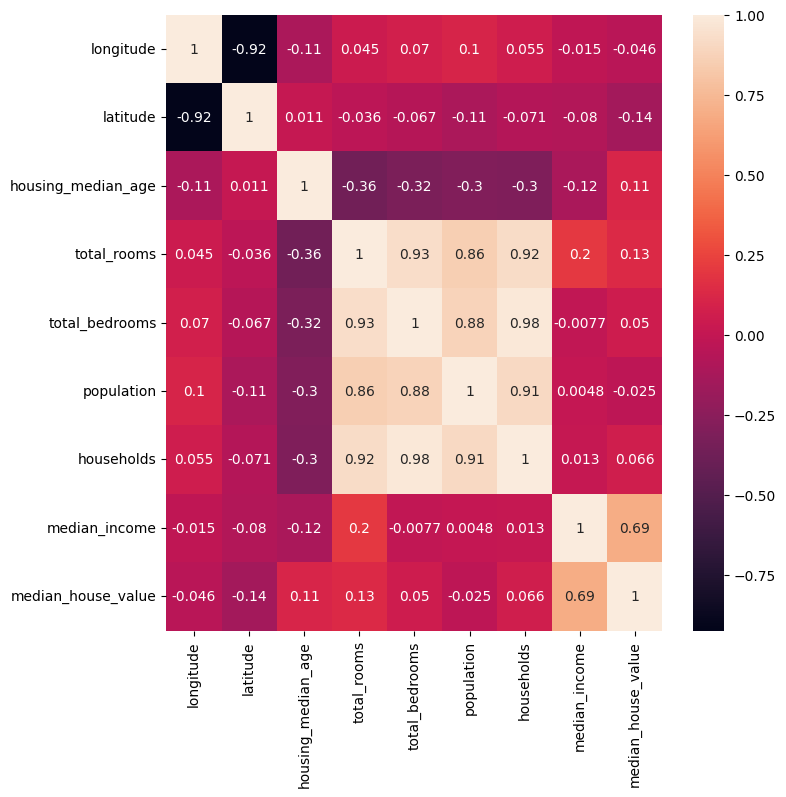

In [7]:
# heatmap shows correlations between features , how related 1 feature is to anothers

# duplicate features should be removed because they teach the model the same thing

plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()


In [8]:
# Feature Engineering
# - adding
# - deleting
# - combining
# - creating new features

In [9]:
# verify which feature have missing values
housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [10]:
# calculate the of missing data
housing_df['total_bedrooms'].isnull().sum() / housing_df.shape[0] * 100

1.002906976744186

In [11]:
# feature engineering

# add new feature to
# we have identified that features with very high correlation teach the model same thing,

# we have strong correlations with below

# we can combine them


housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']
housing_df['coords'] = housing_df['longitude'] / housing_df['latitude']


housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [12]:
# after creating new features we drop the old
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)


housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


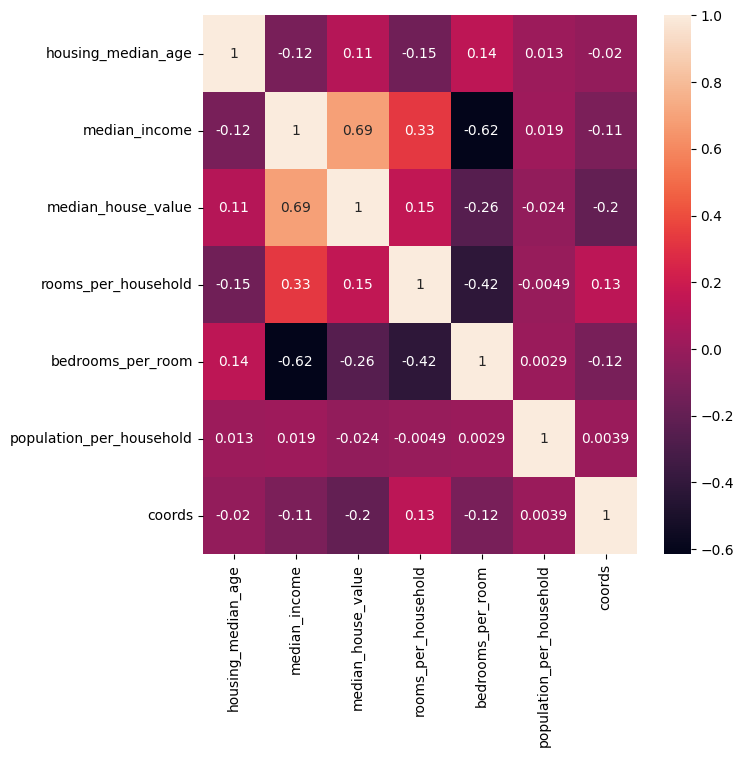

In [13]:
corr = housing_df.select_dtypes(include=np.number).corr()

plt.figure(figsize = (7, 7))

sns.heatmap(corr, annot=True)
plt.show()
# see high correlation does not exist

In [14]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [15]:
# seeing categories for XX

housing_df.ocean_proximity.unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
housing_df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [17]:
# pandas get dummies function
# using one hot encoding to make that string into integer

housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])

housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


In [18]:
# handling missing data
# using k-nearest neighbors (knn) for small data

# using imputations to handle missing data

from sklearn.impute import KNNImputer

# create a temporary copy
housing_df_temp = housing_df.copy()


columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

housing_df_temp = housing_df_temp[new_column_list]

# impute missing data using machine learning

knn = KNNImputer(n_neighbors=3)

# .fit trains the model
knn.fit(housing_df_temp)

# apply transformation model to data
array_values = knn.transform(housing_df_temp)

housing_df_temp = pd.DataFrame(array_values, columns=new_column_list)

In [19]:
housing_df_temp.isnull().sum()

,0
bedrooms_per_room,0


In [20]:
# TRAINING
# - LINEAR REGRESSION
# - RANDOM FOREST REGRESSOR
# - XGBoost

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]


numerical_features = housing_df_encoded.select_dtypes(include=np.number).columns
housing_df_encoded[numerical_features] = knn.fit_transform(housing_df_encoded[numerical_features])

housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# Split target variable and feature variables after imputation
X = housing_df_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_df_encoded['median_house_value']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 10), (6192, 10), (14448,), (6192,))

Linear Regression - Model Training

In [23]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# run predictions
y_pred_test = reg_model.predict(X_test)

In [25]:
pred_test_df = pd.DataFrame({'Actual ': y_test, 'Predicted ': y_pred_test})


pred_test_df

,Actual,Predicted
20046,47700.0,64566.459850
3024,45800.0,115464.021547
15663,500001.0,256554.492279
20484,218600.0,290428.248243
9814,278000.0,221513.278725
...,...,...
17505,237500.0,210121.340663
13512,67300.0,74907.098235
10842,218400.0,216609.962950
16559,119400.0,127975.072923


RandomForestRegressor - Model Training

In [26]:
r2_reg_model_test = round(reg_model.score(X_test, y_test), 2)
print("R^2 Test: {}".format(r2_reg_model_test))


# amount of variance in preictions in dataset,  difference between actual and values, we want this number to be close to 1, now it is 61%

R^2 Test: 0.61


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [28]:
# run predctions

y_rf_pred_test = rf_model.predict(X_test)

In [29]:
# evaluate model
rf_pred_test_df = pd.DataFrame({'Actual ': y_test, 'Predicted ': y_rf_pred_test})


rf_pred_test_df

,Actual,Predicted
20046,47700.0,50710.00
3024,45800.0,87751.00
15663,500001.0,493483.73
20484,218600.0,256710.00
9814,278000.0,233047.00
...,...,...
17505,237500.0,241120.01
13512,67300.0,70537.00
10842,218400.0,211404.00
16559,119400.0,129995.00


In [30]:
# determine accurace using R^2
from sklearn.metrics import r2_score

r2_rf_model_test = round(r2_score(y_test, y_rf_pred_test), 2)
print("R^2 Test: {}".format(r2_rf_model_test))


# this is better than linear regression model

R^2 Test: 0.78


In [31]:
from sklearn.metrics import mean_squared_error
# determine root mean squared error
print("RMSE on Test Data : ", mean_squared_error(y_test, y_rf_pred_test)**0.5)

RMSE on Test Data :  54075.6710307565


XGBoost - Model Training

In [37]:
!pip install xgboost

In [38]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor() # what is think of the error is you have to set parameters to avoid this Future warning

In [39]:
# Train the model using the training sets
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# run the predictions
y_xgb_pred_test = xgb_model.predict(X_test)

In [43]:
#compare the actual values with predicted
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
20046,47700.0,53726.699219
3024,45800.0,73001.664062
15663,500001.0,471508.250000
20484,218600.0,256859.000000
9814,278000.0,271678.812500
...,...,...
17505,237500.0,227466.500000
13512,67300.0,64712.433594
10842,218400.0,218226.109375
16559,119400.0,123181.968750


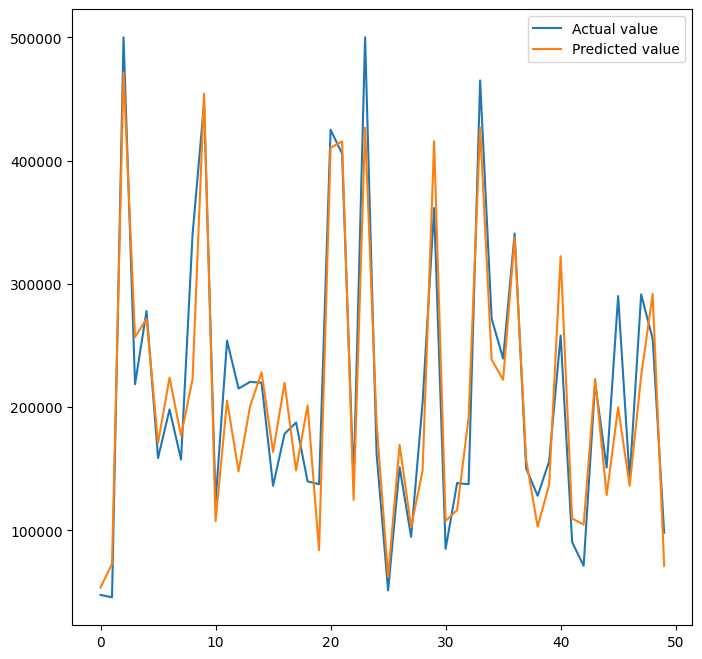

In [44]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [45]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))

35624.820925059554


In [ ]:
# this wont run cause of the earlier error in xgboost XGBRegressor()

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(xgb_model, X, y, scoring='r2', error_score='raise', cv=cv, n_jobs=-1, verbose=1)

#average of all the r2 scores across runs
print(scores.mean())



In [47]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# common params for xgboost
# 'n_estimators': default 100 , number of trees in ensemble
# 'max_depth': default 6, max depth of each tree 1 - 10
# 'learning_rate': default 0.3,  weigh each model often set to small values
# 'subsample': default 1, number of sample / observations
# 'colsample_bytree': default 1, number of features / columns in each tree

In [61]:
xgb_model_2 = XGBRegressor(
    gamma = 0.05,
    learning_rate = 0.3,
    max_depth = 6,
    n_estimators = 100,
    subsample = 0.8,
    scale_pos_weight = 0,
    reg_alpha = 0,
    reg_lambda = 1,
    verbosity = 1
    )

xgb_model_2.fit(X_train, y_train)

y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [62]:
xgb_pred_test_df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_pred_test_df_2

,Actual,Predicted
20046,47700.0,60327.710938
3024,45800.0,84681.617188
15663,500001.0,462468.593750
20484,218600.0,232519.078125
9814,278000.0,297143.968750
...,...,...
17505,237500.0,232763.171875
13512,67300.0,69140.695312
10842,218400.0,232548.468750
16559,119400.0,127110.101562


In [63]:
# R^2 score

r2_xgb_model_2_test = round(r2_score(y_test, y_xgb_2_pred_test), 2)
print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.78


# **Determine which feature is actually important**

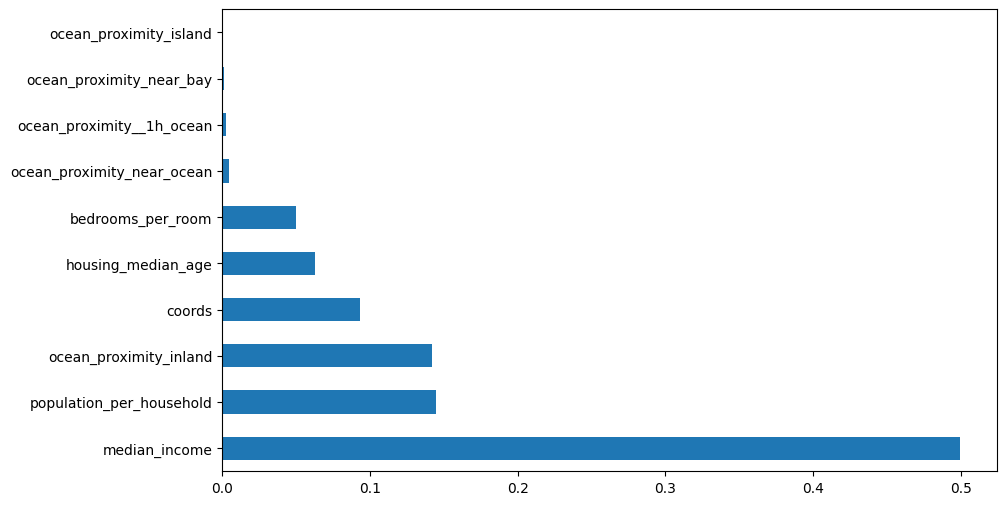

In [67]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# now that we know in xgb_model (Random Forest the order of importance we can focus more on important and omit less important
train_x_if = X_train[['median_income', 'population_per_household','ocean_proximity_inland','coords', 'housing_median_age']]
test_x_if = X_test[['median_income', 'population_per_household','ocean_proximity_inland','coords', 'housing_median_age']]

rf_model_if = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model_if.fit(train_x_if, y_train)

predict_test_with_if = rf_model_if.predict(test_x_if)

In [69]:
# R^2 score
r2_xgb_model_2_test = round(r2_score(y_test, y_xgb_2_pred_test), 2)
print("R^2 Test: {}".format(r2_xgb_model_2_test))

# see!! same score with less features

R^2 Test: 0.78
